In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import pandas as pd 
import seaborn as sns
import plotly.express as px 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import pickle 
#Seeing if our notebook is using the GPU server of Google Colab (Faster Rendering)
tf.test.gpu_device_name()

'/device:GPU:0'

Data Visualization and Analysis

> Statistical Analysis

> Graphs





In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets-Github/adult.data')
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.describe() #Simple Statistical Analysis 


,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum() # None missing values 

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

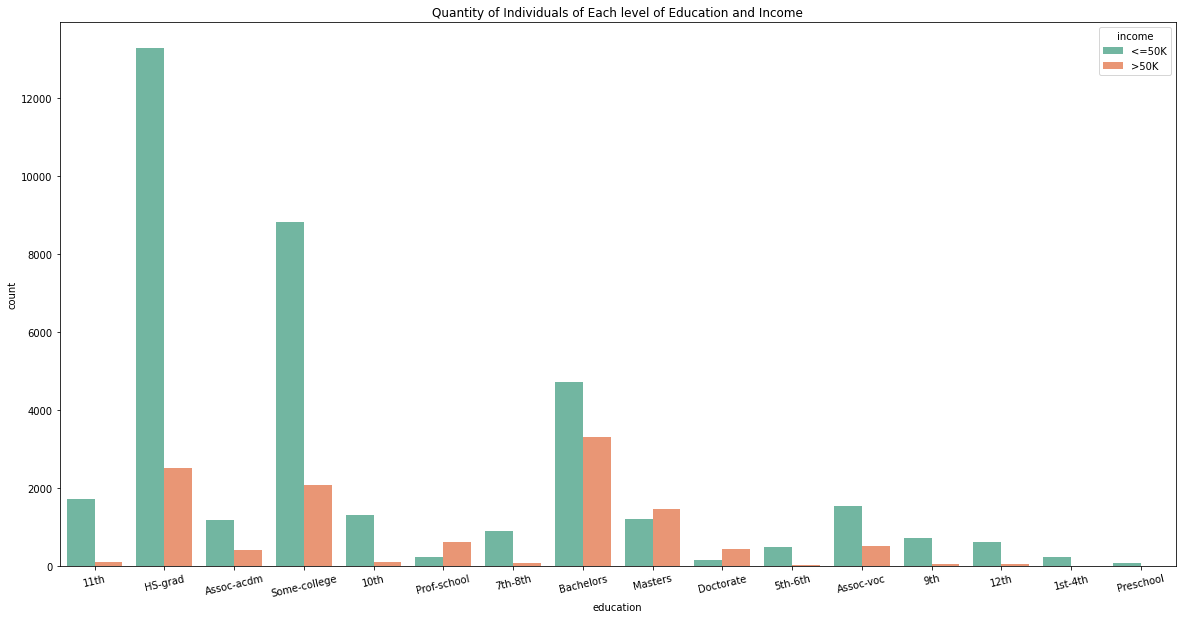

In [ ]:

plt.figure(figsize=(20,10))
fig = sns.countplot(x= df['education'], hue = df.income , 
                    palette= 'Set2',).set_title('Quantity of Individuals of Each level of Education and Income')

plt.xticks(rotation = 13)

In [ ]:
df.income.value_counts().values

array([37155, 11687])

In [ ]:
px.bar(x = df.income.value_counts().index , y = df.income.value_counts().values ,
       color_discrete_sequence = px.colors.qualitative.Set3 , template = 'none' , 
       title = 'Distribution of Income')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

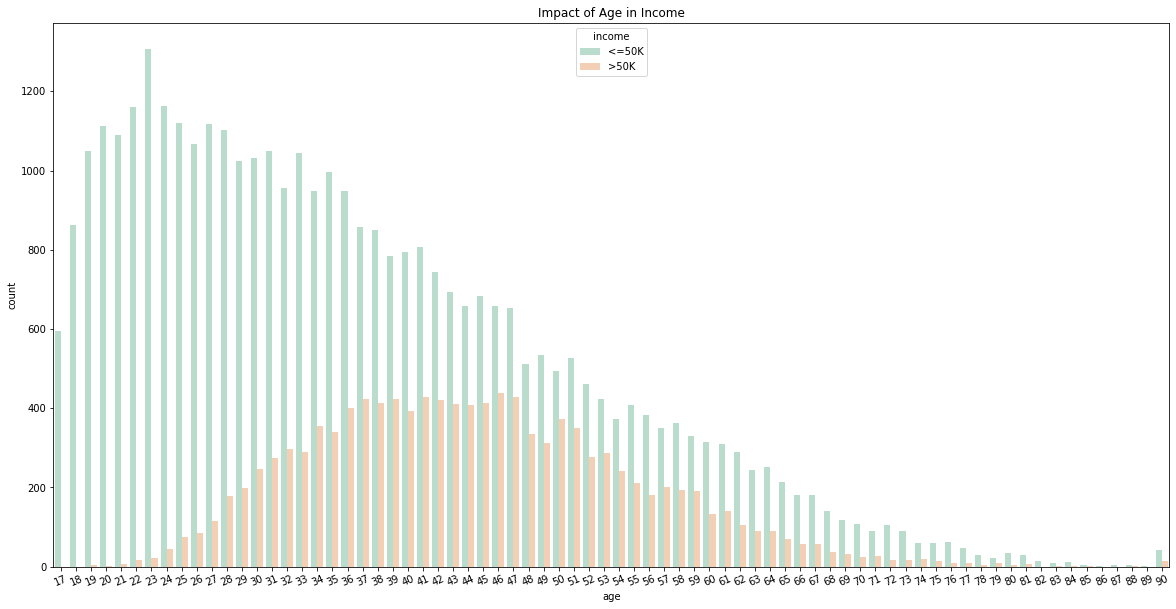

In [ ]:
plt.figure(figsize= (20,10))

sns.countplot(x = df.age , hue = df.income, palette = 'Pastel2').set_title('Impact of Age in Income')

plt.xticks(rotation = 23)

Working in The Variables and Data Preparing For The Model


> Treating the categorical variables for Decision Tree




In [ ]:
#Isolating the categorical variables

cv = df[['workclass' ,'age' ,'education' , 'marital-status','occupation','relationship','race','sex','native-country' 
         , 'hours-per-week']]


#Isolating the target of our model (We want to predict the category of income for each individual)

target = df[['income']]

cv.astype('category')


,workclass,age,education,marital-status,occupation,relationship,race,sex,native-country,hours-per-week
0,Private,25,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,40
1,Private,38,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,50
2,Local-gov,28,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,40
3,Private,44,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,40
4,?,18,Some-college,Never-married,?,Own-child,White,Female,United-States,30
...,...,...,...,...,...,...,...,...,...,...
48837,Private,27,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,38
48838,Private,40,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,40
48839,Private,58,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,40
48840,Private,22,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,20


In [ ]:
# Through this method we transform categorical variables into numerical, without ordinality
# But we create an sparse matrix (That can be costly to proccess)

ctgr = df[df.select_dtypes(['object']).columns]

for i in ctgr:
  enc = LabelEncoder()
  enc.fit(list(ctgr[i].values))
  df[i] = enc.fit_transform(list(df[i].values))
df

#Note that we created some sense of ordinarity between the variables (Something that we could treat using OneHotEncoder())
# But OneHotEncoder is hard to process because this method creates a high dimensionality matrix
#We gonna try using the simple method (LabelEncoder) with the code above and see the accuracy, precision and recall of the model

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:

df = pd.get_dummies(df)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,11,9,4,1,3,4,1,0,0,20,39,0


Splitting the Variables

> X = Features used by the model to predict y

> y = The target of our model








In [ ]:
X = df.drop('income' , axis = 1)
y = df.income

In [ ]:
xtr,xte,ytr,yte = train_test_split(X,y , test_size = .2 ) #We are spliting 80% of the data to train(to be shown to our model)
#and 20% of the data to evaluate (used to test with data that the model didn't see through the learning proccess)

Viewing correlation between variables


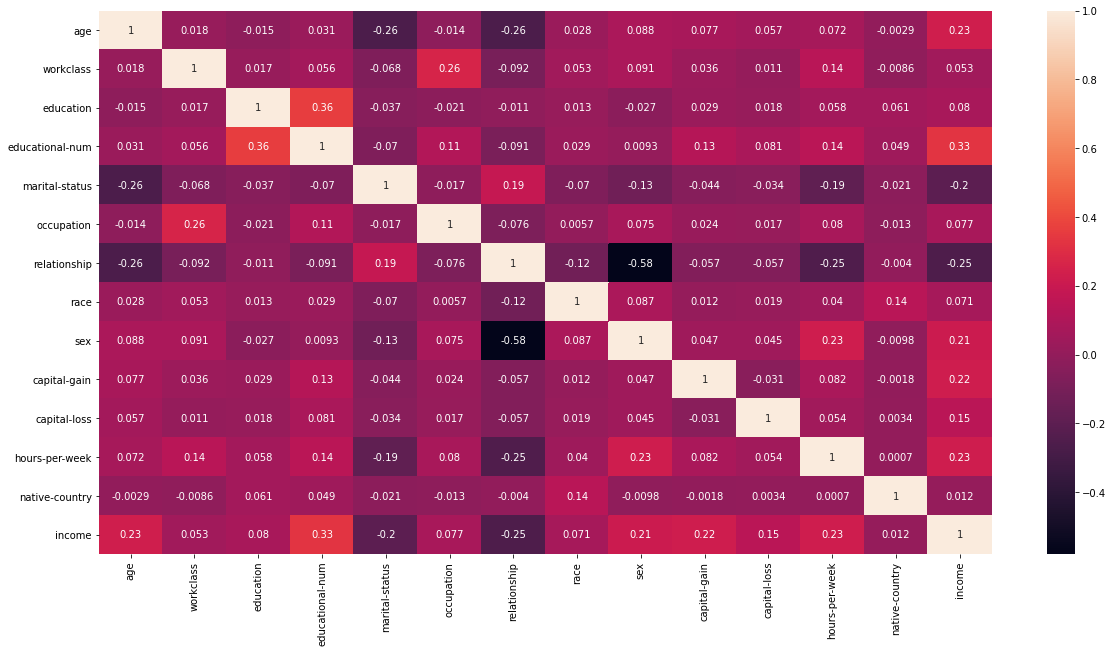

In [ ]:
rPearson = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(rPearson , annot = True , )

Preparing and Testing Models

In [ ]:
#Choosing,Preparing and training the Classifier Model to our data
#Here, our model is DecisionTree (One tree of decision)

tmodel = tree.DecisionTreeClassifier()
tmodel.fit(X,y)

cross_val_score(tmodel, X,y,cv = 10)

array([0.81903787, 0.81637666, 0.80610156, 0.82022932, 0.81736282,
       0.81981982, 0.82780508, 0.82473382, 0.82534808, 0.82084357])

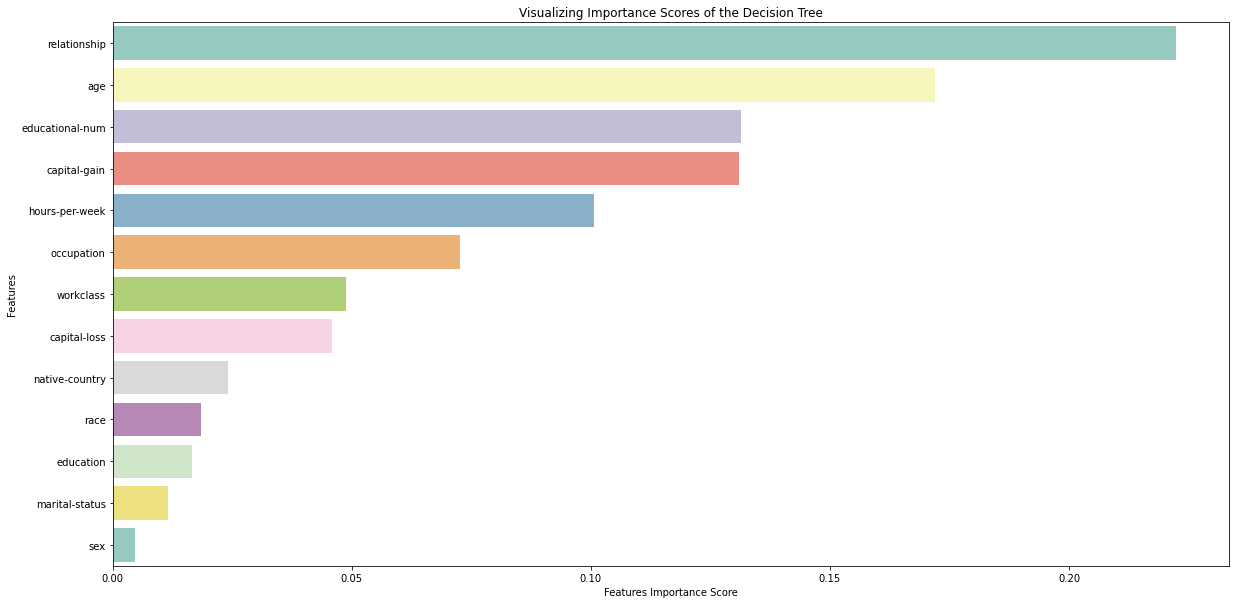

In [ ]:
# The most important features of our model 

ifeatures = pd.Series(tmodel.feature_importances_ , index = X.columns).sort_values(ascending = False)
def vizualizationOfImportantF(features):
  plt.figure(figsize = (20,10))
  sns.barplot(x = features , y = features.index , palette = 'Set3')

  plt.xlabel('Features Importance Score')
  plt.ylabel('Features')
  plt.title('Visualizing Importance Scores of the Decision Tree')
  plt.show()

vizualizationOfImportantF(ifeatures)

#These are the best information to our model, so we gonna take this into consideration and took the top 7 and eliminate the less significant ones

In [ ]:
yp = tmodel.predict(xte)
print(classification_report(yte,yp ,))

# Okay, it's a good model indeed... but we are using Decision Tree, which's a model with a high probability of overfitting
# This is very common with Decision Trees ... Something that we gonna try to work it out in the posteriorly lines of code
# Stick with me :)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7436
           1       0.97      0.90      0.94      2333

    accuracy                           0.97      9769
   macro avg       0.97      0.95      0.96      9769
weighted avg       0.97      0.97      0.97      9769



In [ ]:
print(tmodel.tree_.max_depth) #This was the depth in our tree , the default of min_samples_split is two


43


In [ ]:
# To achieve a good model of classification without facing the problems of oversampling and undersampling, we gonna use Random Forest
# This is basically the same thing as the model DecisionTree, but we use a Forest (With many decisions trees and we averaged the decisions)
# Through Averaging the Decisions of individually good models, we get a good response, kinda like the real-life

RF = RandomForestClassifier()

In [ ]:
cross_val_score(RF , X , y , cv = 10)

array([0.84749232, 0.84503582, 0.84725635, 0.84930385, 0.8478706 ,
       0.84398034, 0.8531941 , 0.8523751 , 0.85995086, 0.8536036 ])

In [ ]:
X['relationship']

0        3
1        0
2        0
3        0
4        3
        ..
48837    5
48838    0
48839    4
48840    3
48841    5
Name: relationship, Length: 48842, dtype: int64

By Selecting the Best Features to our model, we avoid costly processes and we create simpler models (we gonna be parsimonious)

In [ ]:

#These are the top 7 informations to our model, and we gonna isolate in a new variable :)

TopFeatures = ['relationship' , 'age' , 'educational-num', 'capital-gain' , 'hours-per-week' , 'occupation' , 'workclass']
Xi = pd.DataFrame()

for i in TopFeatures:
  z  = df[i ]
  Xi[i] = z.values


In [ ]:
Xi.head()
#Now we have the bests parameters for our model (maybe we lose a little bit in accuracy, 
#but we gonna try to find the best parameter through GridSearch when avoiding overfit)
#Selecting the best parameters has a good impact on our model (faster convergence and parsimony)

,relationship,age,educational-num,capital-gain,hours-per-week,occupation,workclass
0,3,25,7,0,40,7,4
1,0,38,9,0,50,5,4
2,0,28,12,0,40,11,2
3,0,44,10,7688,40,7,4
4,3,18,10,0,30,0,0


In [ ]:
cross_val_score(RF,Xi,y,scoring = 'accuracy') # Using The Random Forest defeault parameters we get these accuracies through cross-validation

array([0.84041355, 0.83601187, 0.83640459, 0.84029484, 0.84367322])

In [ ]:
treeqntt = [10,20,50,100,150,]
crit = ['gini' , 'entropy']

pgrid = dict(n_estimators = treeqntt , 
             criterion  = crit , )

#The only thing that is different for this model compared with the anterior (Decision Tree) is the parameter n_estimator
#in this case we have a Forest with a bunch of models (like the old one that we tested) and by using several trees
#we can find a better model by averaging the tree decisions


Searching the Best Parameters

In [ ]:
grid = GridSearchCV(RandomForestClassifier() ,pgrid,scoring = 'accuracy' , cv =10 , verbose = 1 )

In [ ]:
grid.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

Best parameters obtained

In [ ]:
grid.best_params_ #okay we got the best parameters of our test

{'criterion': 'entropy', 'n_estimators': 150}

Testing and Seeing The Accuracy, Precision and Recall

In [ ]:
RFbest = RandomForestClassifier(n_estimators = 150 ,  criterion = 'entropy')
cross_val_score(RFbest , X, y , cv = 10 , scoring = 'accuracy')

array([0.8468782 , 0.84708291, 0.84520885, 0.84807535, 0.8490991 ,
       0.8458231 , 0.8527846 , 0.85094185, 0.86097461, 0.85053235])

In [ ]:
RFbest.fit(xtr,ytr)
yp = RFbest.predict(xte)
yhat = yte 
RMSE = np.sqrt(mean_squared_error(yhat , yp ))
RMSE
#RMSE is a measure of deviance (how much the result of our test distanciate from the real value)

0.38499866726348103

In [ ]:
pd.crosstab(yhat , yp , rownames = ['Real'] , colnames = ['Predict'] , margins = True)

Predict,0,1,All
Real,,,
0,6877,559,7436
1,889,1444,2333
All,7766,2003,9769


In [ ]:
print(classification_report(yhat , yp ))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7436
           1       0.72      0.62      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



Saving the model to the disk

In [ ]:

pickle.dump(RFbest, open('ForestClf.sav', 'wb'))
pickle.load(open('ForestClf.sav' , 'rb'))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)